In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functions to update and compute the output

In [21]:
def update_network(leaking_rate,X,y_fb,W,Wfb,f):
    return (1-leaking_rate) * X + leaking_rate * f(W.dot(X) + Wfb.dot(y_fb))

def compute_output(X,Wout):
    return Wout.T.dot(X)

# Initialization of the network

In [22]:
N = 20
X = np.random.rand(N) - 0.5
W = np.random.rand(N,N) - 0.5
Wbf = (np.random.rand(N,1) - 0.5)
rhoW = np.max(np.abs(np.linalg.eig(W)[0]))
W *= 0.9 / rhoW

# Objective function

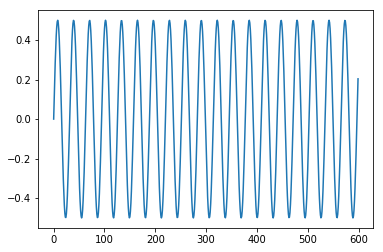

In [23]:
y = (0.5*np.sin(np.asarray(range(600)) * 0.2)).reshape(600,1)
_ = plt.plot(range(len(y)),y)

# Training
+ 100 iterations are executed without recording, to replace the initial conditions
+ Record the answers during 200 iterations 

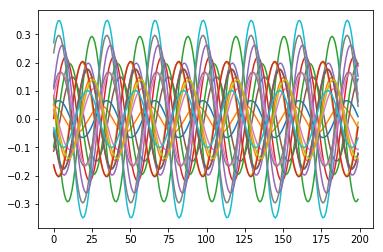

In [24]:
X_full = np.ones((200,20))
for i in range(100):
    X = update_network(0.5,X,y[i],W,Wbf,np.tanh)

for i in range(200):
    X_full[i,:] = X
    X = update_network(0.5,X,y[i+100],W,Wbf,np.tanh)
_=plt.plot(pd.DataFrame(X_full))

# Use pseudo inverse to compute $W^{out}$

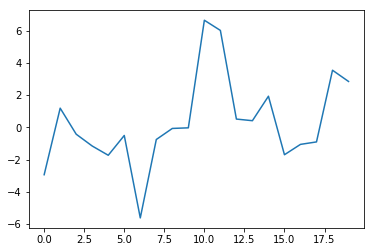

In [27]:
Wout = np.linalg.pinv(X_full).dot(y[100:300,:])
_=plt.plot(pd.DataFrame(Wout))

# plot objective function and predicted function

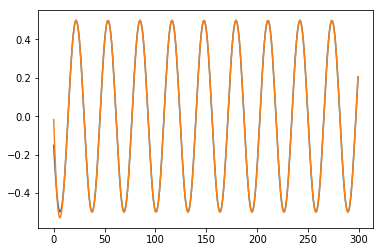

In [28]:
ans = []
for i in range(300):
    X = update_network(0.5,X,y[i+300-1],W,Wbf,np.tanh)
    ans.append(compute_output(X,Wout))

_ = plt.plot(range(300),y[300:])
_ = plt.plot(range(300),ans)
